In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
from PIL import Image
import numpy as np
from scipy.misc import imresize
import random 
import torch
import os
import time
import torch.nn as nn
%matplotlib inline

In [3]:
import sys
sys.path.append('week3')

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [5]:
from preprocessor import Preprocessor

In [6]:
preprocessor = Preprocessor('pong', 210, 160, device)

In [7]:
env = gym.make("Pong-v0")
observation = env.reset()

In [8]:
observation.shape

(210, 160, 3)

In [9]:
for action_id, name in enumerate(env.unwrapped.get_action_meanings()):
    print(action_id, name)

0 NOOP
1 FIRE
2 RIGHT
3 LEFT
4 RIGHTFIRE
5 LEFTFIRE


In [10]:
NOOP, RIGHT, LEFT= 0, 2, 3

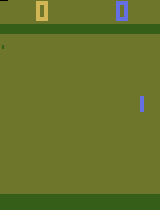

In [11]:
Image.fromarray(observation)

In [12]:
ob = env.reset()

In [13]:
for i in range(4):
    observation, reward, done, info = env.step(3)
    frame = preprocessor.rgb2gray(observation)
    frames = preprocessor.phi(observation)
frames = preprocessor.phi(observation)
# plt.imshow(frame, cmap = "gray")
reward, done, info, frame.shape, frames.shape

(0.0, False, {'ale.lives': 0}, (84, 84), torch.Size([1, 4, 84, 84]))

In [14]:
from support import show_image_from_frames

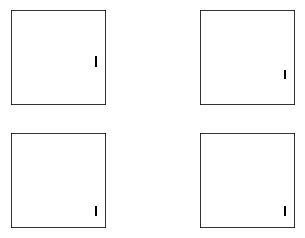

In [15]:
show_image_from_frames(frames)

### Build model:

In [16]:
from models import DQN

In [17]:
from support import run_optimizer

In [18]:
# Test model:

In [19]:
# Q_net = DQN([4], 3).to(device)
# run_optimizer(Q_net, frames, device=device, lr=1, n_iter=2, is_train=[True, True, True])

In [20]:
# Q_net = DQN([4], 3).to(device)
# run_optimizer(Q_net, frames, device=device, lr=0.01, n_iter=2, is_train=[True, True, True])

In [21]:
# Q_net = DQN([4], 3).to(device)
# run_optimizer(Q_net, frames, device=device, lr=0.0001, n_iter=2, is_train=[True, True, True])

In [22]:
Q_net = DQN([4], 3).to(device)
run_optimizer(Q_net, frames, device=device, lr=0.00003, n_iter=2, is_train=[True, True, True])

y_hat tensor([[0.1533, 0.0180, 0.2710]], device='cuda:0', grad_fn=<AddmmBackward>).
y_0 tensor([[0.1533]], device='cuda:0', grad_fn=<GatherBackward>).
y_1 tensor([[0.0180]], device='cuda:0', grad_fn=<GatherBackward>)
y_2 tensor([[0.2710]], device='cuda:0', grad_fn=<GatherBackward>)
new y_hat tensor([[-0.4936,  0.4138,  0.6698]], device='cuda:0', grad_fn=<AddmmBackward>)
y_hat tensor([[-0.4936,  0.4138,  0.6698]], device='cuda:0', grad_fn=<AddmmBackward>).
y_0 tensor([[-0.4936]], device='cuda:0', grad_fn=<GatherBackward>).
y_1 tensor([[0.4138]], device='cuda:0', grad_fn=<GatherBackward>)
y_2 tensor([[0.6698]], device='cuda:0', grad_fn=<GatherBackward>)
new y_hat tensor([[-0.7037,  0.6934,  0.8499]], device='cuda:0', grad_fn=<AddmmBackward>)


In [23]:
# good learning rate is about 0.00003

### Data loader:

In [24]:
from dataloader import DataLoader

### Algorithm 1: deep Q-learning with experience replay.

In [25]:
from policies import Policy

In [26]:
0.989 ** 200

0.10946072477880486

In [27]:
preprocessor = Preprocessor('pong', 210, 160, device)
D = DataLoader(32)

In [28]:
pwd

'/home/vule/projects/RL_Challenge'

In [29]:
home_dir = '/home/vule/projects/RL_Challenge'

In [30]:
epsilon=1
Q = Policy(home_dir, DQN([4,84,84], 3), 3, device, epsilon=epsilon)
Q_hat = Policy(home_dir, DQN([4,84,84], 3), 3, device, epsilon=epsilon)
Q_hat.update_state_dict(Q)

In [31]:
from support import play

In [32]:
# let play
# expected behavior: the bar will move randomly because the Q net is created randomly.
_ = env.reset()
game, env, win, done = play(env, Q, preprocessor, is_e_greedy=False, render=True)

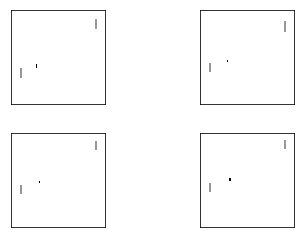

In [33]:
show_image_from_frames(game[46][0])

In [34]:
Q.net(game[53][0])

tensor([[0.1487, 0.1408, 0.1439]], device='cuda:0', grad_fn=<AddmmBackward>)

In [35]:
# let play the second round:
game, env, win, done = play(env, Q, preprocessor, is_e_greedy=False, render=True)

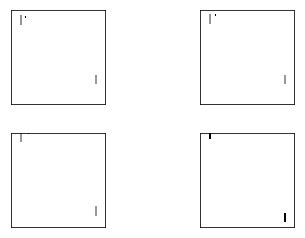

In [36]:
show_image_from_frames(game[38][0])

In [37]:
# let play the third round:
game, env, win, done = play(env, Q, preprocessor, is_e_greedy=False, render=False)

In [38]:
win, done

(True, False)

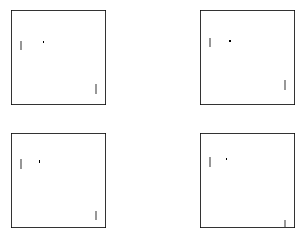

In [39]:
show_image_from_frames(game[30][0])

In [40]:
from game_generator import generate_game

In [41]:
env.reset()
generate_game(1, D, Q, preprocessor, env, is_e_greedy=True, verbose=True)

In [42]:
Q.epsilon = 0.1

In [43]:
generate_game(30, D, Q, preprocessor, env, True, verbose=False)

Win 4 - 21 Loss 
Win 6 - 21 Loss 
Win 10 - 21 Loss 
Win 9 - 21 Loss 
Win 9 - 21 Loss 
Win 8 - 21 Loss 
Win 8 - 21 Loss 
Win 9 - 21 Loss 
Win 8 - 21 Loss 
Win 10 - 21 Loss 
Win 11 - 21 Loss 
Win 15 - 21 Loss 
Win 15 - 21 Loss 
Win 8 - 21 Loss 
Win 7 - 21 Loss 
Win 8 - 21 Loss 
Win 5 - 21 Loss 
Win 5 - 21 Loss 
Win 3 - 21 Loss 
Win 6 - 21 Loss 
Win 7 - 21 Loss 
Win 12 - 21 Loss 
Win 8 - 21 Loss 
Win 16 - 21 Loss 
Win 2 - 21 Loss 
Win 13 - 21 Loss 
Win 11 - 21 Loss 
Win 8 - 21 Loss 
Win 5 - 21 Loss 
Win 8 - 21 Loss 


In [44]:
len(D)

78377

In [45]:
MAX_N_GAMES = 1
n_iteration = 3

In [46]:
Q_net = DQN([4], 3).to(device)
optimizer = torch.optim.RMSprop(Q_net.parameters(), lr=0.00003)
MSE = nn.MSELoss(reduction='sum')

In [47]:
batch, is_mixed = D.get_sample()
np.array([sample[2] for sample in batch]).reshape(4, 8)

array([[-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [48]:
def test_gradient_batch(batch, MSE, optimizer, n=4):
    batch_state = [sample[0] for sample in batch]
    batch_state = torch.cat(batch_state)
    y = torch.from_numpy(np.array([sample[2] for sample in batch])).float().to(device).view(-1, 1)
    print(y.view(-1, 8))
    for i in range(n):
        y_Q = Q_net(batch_state)
        batch_a = [[sample[1]] for sample in batch]
        idx = torch.LongTensor(batch_a).to(device)
        y_Q = torch.gather(y_Q, 1, idx)
        print(y_Q.view(-1, 8))
        loss = MSE(y_Q, y)
        print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_Q = Q_net(batch_state)
        y_Q = torch.gather(y_Q, 1, idx)
    print(y_Q.view(-1, 8))

In [49]:
test_gradient_batch(batch, MSE, optimizer, n=6)

tensor([[-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], device='cuda:0')
tensor([[-0.0934, -0.0282,  0.2083, -0.1210,  0.1202, -0.0145, -0.0300, -0.0912],
        [ 0.0092, -0.0752, -0.0278,  0.1017, -0.0580,  0.0760, -0.1203, -0.1071],
        [ 0.0887, -0.0016, -0.0274,  0.1372,  0.0702,  0.0535, -0.0151,  0.0173],
        [ 0.0320,  0.3275, -0.0544, -0.1229,  0.0370,  0.0991, -0.0162,  0.0344]],
       device='cuda:0', grad_fn=<ViewBackward>)
tensor(1.1314, device='cuda:0', grad_fn=<MseLossBackward>)
tensor([[-0.7349,  0.0320, -0.3623,  0.0853, -0.2831, -0.1571, -0.0993,  0.0130],
        [-0.1475,  0.1540, -0.0398, -0.5346,  0.4450, -0.3818,  0.3485,  0.0125],
        [-0.7836, -0.1421,  0.0621, -0.5218, -0.5869, -0.1158, -0.1025, -0.5881],
        [-0.4462, -0.7535, -0.1476,  0.0479, -0.0358, -0.3986,  0.0747, -0.2005]],
       device='cu

In [50]:
batch_state = [sample[0] for sample in batch[0:2]]
batch_state = torch.cat(batch_state)
Q_net(batch_state)

tensor([[-1.1943,  0.1861,  0.1399],
        [ 0.0013,  0.0121, -0.0018]], device='cuda:0', grad_fn=<AddmmBackward>)

In [51]:
batch_state = [sample[0] for sample in batch[0:4]]
batch_state = torch.cat(batch_state)
Q_net(batch_state)

tensor([[-1.0345,  0.1190,  0.0956],
        [-0.0107, -0.0013, -0.0137],
        [-0.0266, -0.0990, -0.0021],
        [-0.0421,  0.0113,  0.0061]], device='cuda:0', grad_fn=<AddmmBackward>)

In [52]:
# Problem: Inconsistent results during test using different batch size.
# https://discuss.pytorch.org/t/solved-inconsistent-results-during-test-using-different-batch-size/2265/7
Q_net.train(False)

DQN(
  (conv): Sequential(
    (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=3136, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=3, bias=True)
  )
)

In [53]:
batch_state = [sample[0] for sample in batch[0:2]]
batch_state = torch.cat(batch_state)
Q_net(batch_state)

tensor([[-0.0375, -0.0112, -0.0360],
        [-0.0363, -0.0116, -0.0361]], device='cuda:0', grad_fn=<AddmmBackward>)

In [54]:
batch_state = [sample[0] for sample in batch[0:4]]
batch_state = torch.cat(batch_state)
Q_net(batch_state)

tensor([[-0.0375, -0.0112, -0.0360],
        [-0.0363, -0.0116, -0.0361],
        [-0.0366, -0.0112, -0.0363],
        [-0.0362, -0.0117, -0.0367]], device='cuda:0', grad_fn=<AddmmBackward>)

In [55]:
Q_net.train(True)

DQN(
  (conv): Sequential(
    (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=3136, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=3, bias=True)
  )
)

In [56]:
batch_state = [sample[0] for sample in batch[0:1]]
batch_state = torch.cat(batch_state)
Q_net(batch_state)

tensor([[-0.8981,  0.1327,  0.0731]], device='cuda:0', grad_fn=<AddmmBackward>)

In [57]:
batch_state = [sample[0] for sample in batch[0:2]]
batch_state = torch.cat(batch_state)
Q_net(batch_state)

tensor([[-1.1943,  0.1861,  0.1399],
        [ 0.0013,  0.0121, -0.0018]], device='cuda:0', grad_fn=<AddmmBackward>)

In [58]:
# Test policy:
epsilon=1
# Q = Policy(DQN([4,84,84], 3), 3, device, epsilon=epsilon)
optimizer = torch.optim.RMSprop(Q.net.parameters(), lr=0.00003)
MSE = nn.MSELoss(reduction='sum')

In [59]:
def test_Q_gradient_batch(batch, MSE, optimizer, n=4):
    batch_state = [sample[0] for sample in batch]
    batch_state = torch.cat(batch_state)
    y = torch.from_numpy(np.array([sample[2] for sample in batch])).float().to(device).view(-1, 1)
    print(y.view(-1, 8))
    for i in range(n):
        y_Q = Q.net(batch_state)
        batch_a = [[sample[1]] for sample in batch]
        idx = torch.LongTensor(batch_a).to(device)
        y_Q = torch.gather(y_Q, 1, idx)
        print(y_Q.view(-1, 8))
        loss = MSE(y_Q, y)
        print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_Q = Q.net(batch_state)
        y_Q = torch.gather(y_Q, 1, idx)
    print(y_Q.view(-1, 8))

In [60]:
test_Q_gradient_batch(batch, MSE, optimizer, n=4)

tensor([[-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], device='cuda:0')
tensor([[-1.0096,  0.1648,  0.0992,  0.1742, -0.0848,  0.2019,  0.1289,  0.3390],
        [ 0.2112, -0.0118,  0.2421,  0.1490,  0.1422,  0.0166,  0.1821,  0.1446],
        [ 0.1781,  0.2191,  0.2039,  0.2489,  0.1301,  0.0862,  0.1990, -0.1843],
        [ 0.0813,  0.1900,  0.2068,  0.2133,  0.4855,  0.1909,  0.2005,  0.2966]],
       device='cuda:0', grad_fn=<ViewBackward>)
tensor(1.2595, device='cuda:0', grad_fn=<MseLossBackward>)
tensor([[ 0.0913, -0.0113,  0.0017,  0.0013, -0.0270, -0.0407,  0.0214,  0.0175],
        [ 0.0362, -0.0212,  0.0463,  0.0136, -0.0204, -0.0384, -0.0392, -0.0278],
        [-0.0560, -0.0372, -0.0108,  0.0431, -0.0177, -0.0459,  0.0366, -0.0356],
        [-0.0474, -0.0135,  0.0195, -0.0166, -0.0039,  0.0211, -0.0050,  0.0312]],
       device='cu

In [61]:
# test on real case:
# Test policy function:
epsilon=1
Q = Policy(home_dir, DQN([4,84,84], 3), 3, device, epsilon=epsilon)
Q_hat = Policy(home_dir, DQN([4,84,84], 3), 3, device, epsilon=epsilon)

In [62]:
Q_hat.update_state_dict(Q)

In [63]:
y = Q.get_target(batch, is_mixed=is_mixed)
print(y.view(-1, 8))

tensor([[-1.0000,  0.1612,  0.0770,  0.1793, -0.0666,  0.2369,  0.1021,  0.2963],
        [ 0.2063, -0.0494,  0.2415,  0.1384,  0.1268,  0.1504,  0.1835,  0.1275],
        [ 0.1816,  0.1921,  0.2081,  0.2596,  0.1067,  0.0927,  0.2145, -0.2205],
        [ 0.1382,  0.1588,  0.2495,  0.2206,  0.4698,  0.2094,  0.1692,  0.2853]],
       device='cuda:0')


In [64]:
y = Q_hat.get_target(batch, is_mixed=is_mixed)
print(y.view(-1, 8))

tensor([[-1.0000,  0.1612,  0.0770,  0.1793, -0.0666,  0.2369,  0.1021,  0.2963],
        [ 0.2063, -0.0494,  0.2415,  0.1384,  0.1268,  0.1504,  0.1835,  0.1275],
        [ 0.1816,  0.1921,  0.2081,  0.2596,  0.1067,  0.0927,  0.2145, -0.2205],
        [ 0.1382,  0.1588,  0.2495,  0.2206,  0.4698,  0.2094,  0.1692,  0.2853]],
       device='cuda:0')


In [65]:
Q.min_loss = 0.1

In [66]:
Q.max_iter

5

In [67]:
Q.update_Q(y, batch, verbose=True)
    
print(Q.get_y_hat(batch).view(-1, 8))

tensor(0.0558, device='cuda:0', grad_fn=<MseLossBackward>)
tensor([[-1.6155,  0.1971,  0.0958,  0.2629,  0.0958,  0.3004,  0.1444,  0.0916],
        [ 0.2432, -0.1010,  0.2090,  0.2077,  0.1422,  0.3417,  0.2714,  0.1769],
        [ 0.2988,  0.2824,  0.2086,  0.3081,  0.0611,  0.0270,  0.3029, -0.5430],
        [ 0.3067,  0.0882,  0.3282,  0.2632,  0.6804,  0.3716,  0.1414,  0.3219]],
       device='cuda:0', grad_fn=<ViewBackward>)


In [68]:
MAX_N_GAMES = 1
n_iteration = 1
def train_model(n_iteration, verbose=True):
    for i in range(n_iteration):
        if verbose:
            print(i)
        batch, is_mixed = D.get_sample()
        rewards = [t[2] for t in batch]
        if verbose:
            print(np.array(rewards).reshape(4,8), is_mixed)
        y = Q_hat.get_target(batch, is_mixed=is_mixed).detach()
        if verbose:
            print(y.view(4,8))
        if verbose:
            old_y = Q.get_y_hat(batch)
            print(old_y.view(4,8))
        Q.update_Q(y, batch, verbose)
        if verbose:
            new_y = Q.get_y_hat(batch)
            print(new_y.view(4,8))

In [69]:
Q.max_iter = 4

In [70]:
Q.min_loss = 0.1

In [71]:
train_model(1, verbose=True)

0
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]] None
tensor([[-0.0523,  0.1772,  0.1516,  0.2539,  0.1959, -0.2842,  0.0354,  0.1629],
        [-0.0013,  0.1693,  0.1987,  0.1536,  0.1366,  0.0640,  0.1029, -0.0069],
        [ 0.1641,  0.0879, -0.5292,  0.1647,  0.1119,  0.1476,  0.1843,  0.0955],
        [ 0.1550,  0.1408,  0.0323,  0.2396,  0.1594,  0.1327, -0.4884,  0.1518]],
       device='cuda:0')
tensor([[-0.0205,  0.1091,  0.2151,  0.3429,  0.2541, -0.2837, -0.2440,  0.2415],
        [-0.0245,  0.2409,  0.2239,  0.1542,  0.1467,  0.1455,  0.1556,  0.0425],
        [ 0.2054,  0.0622, -0.0754,  0.1641,  0.1944,  0.1778,  0.2191,  0.1457],
        [ 0.1883,  0.1692,  0.0304,  0.3511,  0.2028,  0.2587, -0.5210,  0.1453]],
       device='cuda:0', grad_fn=<ViewBackward>)
tensor(0.3765, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(1.2836, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(1.3289, device='cuda:0', grad

In [72]:
# train model:
# looking for value of reward 1 and -1:
MAX_N_GAMES = 200
n_iteration = 200
Q.update_epsilon(0.1)
Q.update_optimizer(lr=1e-5)
Q.min_loss = 0.1
Q.max_iter = 4
for episode in range(MAX_N_GAMES):
    if episode % 5 == 0:
        print(episode)
    observation = env.reset()
    
    generate_game(1, D, Q, preprocessor, env, is_e_greedy=True, verbose=False, is_update_epsilon=False)

    train_model(n_iteration, verbose=False)
        
    Q_hat.update_state_dict(Q)
    Q.update_epsilon()
    Q.update_min_loss()
Q.save_model()

0
Win 1 - 21 Loss 
Win 5 - 21 Loss 
Win 4 - 21 Loss 
Win 4 - 21 Loss 
Win 6 - 21 Loss 
5
Win 10 - 21 Loss 
Win 4 - 21 Loss 
Win 3 - 21 Loss 
Win 12 - 21 Loss 
Win 3 - 21 Loss 
10
Win 6 - 21 Loss 
Win 5 - 21 Loss 
Win 10 - 21 Loss 
Win 3 - 21 Loss 
15
Win 6 - 21 Loss 
Win 3 - 21 Loss 
Win 7 - 21 Loss 
Win 5 - 21 Loss 
Win 10 - 21 Loss 
20
Win 3 - 21 Loss 
Win 18 - 21 Loss 
Win 2 - 21 Loss 
Win 5 - 21 Loss 
Win 8 - 21 Loss 
25
Win 11 - 21 Loss 
Win 8 - 21 Loss 
Win 3 - 21 Loss 
Win 9 - 21 Loss 
30
Win 7 - 21 Loss 
Win 7 - 21 Loss 
Win 2 - 21 Loss 
Win 4 - 21 Loss 
35
Win 4 - 21 Loss 
Win 16 - 21 Loss 
Win 3 - 21 Loss 
Win 11 - 21 Loss 
Win 5 - 21 Loss 
40
Win 3 - 21 Loss 
Win 9 - 21 Loss 
Win 12 - 21 Loss 
Win 10 - 21 Loss 
Win 9 - 21 Loss 
45
Win 8 - 21 Loss 
Win 10 - 21 Loss 
Win 9 - 21 Loss 
Win 11 - 21 Loss 
Win 10 - 21 Loss 
50
Win 8 - 21 Loss 
Win 6 - 21 Loss 
Win 10 - 21 Loss 
Win 11 - 21 Loss 
Win 10 - 21 Loss 
55
Win 3 - 21 Loss 
Win 15 - 21 Loss 
Win 6 - 21 Loss 
Win 2 - 21 Los

In [75]:
_ = env.reset()

In [ ]:
_ = play(env, Q, preprocessor, False, render=True)